In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비 

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 random_state = 12)

In [12]:
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)
test_seq = pad_sequences(x_test, maxlen = 100)

# 모델 구성

In [13]:
train_seq.shape

(20000, 100)

In [14]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 100, input_shape = (100,)))
model.add(keras.layers.Dropout(0.5)) # 밥에 소금, 후추 뿌리는 개념 
model.add(keras.layers.Conv1D(64, 5, activation="relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(55))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          500000    
                                                                 
 dropout_1 (Dropout)         (None, 100, 100)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            32064     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [16]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-codel.h5",
                                                save_best_only= True)

In [17]:
history = model.fit(train_seq, y_train, batch_size = 128, epochs = 50,
                   validation_data= (val_seq, y_val),
                   callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/50
157/157 [==============================] - 8s 37ms/step - loss: 0.4938 - accuracy: 0.7476 - val_loss: 0.3611 - val_accuracy: 0.8438
Epoch 2/50
  3/157 [..............................] - ETA: 6s - loss: 0.3248 - accuracy: 0.8516

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 5s 34ms/step - loss: 0.3077 - accuracy: 0.8696 - val_loss: 0.3442 - val_accuracy: 0.8484
Epoch 3/50
157/157 [==============================] - 5s 32ms/step - loss: 0.2551 - accuracy: 0.8965 - val_loss: 0.3441 - val_accuracy: 0.8544
Epoch 4/50
157/157 [==============================] - 5s 32ms/step - loss: 0.2258 - accuracy: 0.9103 - val_loss: 0.3435 - val_accuracy: 0.8520
Epoch 5/50
157/157 [==============================] - 5s 32ms/step - loss: 0.1880 - accuracy: 0.9283 - val_loss: 0.3706 - val_accuracy: 0.8530
Epoch 6/50
157/157 [==============================] - 5s 32ms/step - loss: 0.1641 - accuracy: 0.9388 - val_loss: 0.3827 - val_accuracy: 0.8486
Epoch 7/50
157/157 [==============================] - 5s 32ms/step - loss: 0.1331 - accuracy: 0.9524 - val_loss: 0.4290 - val_accuracy: 0.8428
Epoch 8/50
157/157 [==============================] - 5s 32ms/step - loss: 0.1131 - accuracy: 0.9592 - val_loss: 0.4859 - val_accuracy: 0.8422


In [18]:
model.evaluate(test_seq, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.3431 - accuracy: 0.8512


[0.3431141674518585, 0.8512399792671204]

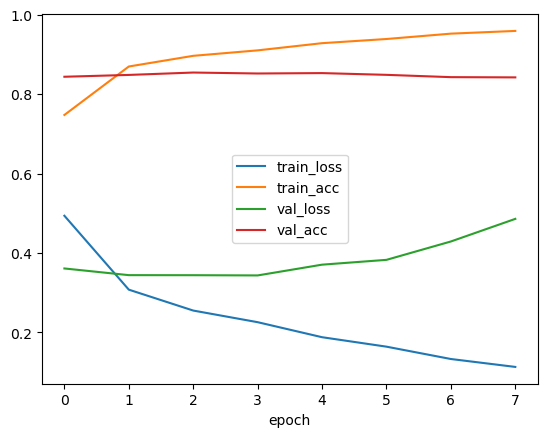

In [19]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()